# Exploratory Data Analyses 

#### Import Necessary Libraries

In [1]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
%matplotlib inline

#### Merging 12 months of sales data into a single file

In [2]:
files = [file for file in os.listdir('./sales_data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./sales_data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

#### Read in updated dataframe

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Order Date,Purchase Address
0,40096,Shoes,F,Calf Boots,39.0,grey,1,149.99,21/04/2019 16:00,"Stationsstraat 84, 1084CN Rotterdam"
1,40097,Shoes,F,Ankle Boots,41.0,white,1,119.99,01/04/2019 19:28,"Molenstraat 38, 1030AN Deventer"
2,40097,Bags,F,Shopper,NaN,white,1,79.99,01/04/2019 19:28,"Molenstraat 38, 1030AN Deventer"
3,40098,Shoes,M,Boots,42.0,black,1,119.99,18/04/2019 10:32,"Meidoornlaan 80, 1096IA Haarlem"
4,40099,Accessories,M,Scarf,NaN,black,1,24.99,03/04/2019 18:10,"Groeneweg 9, 1002YC 's-Hertogenbosch"


### Visually inspect data

In [4]:
all_data.columns

Index(['Order ID', 'Category', 'Gender', 'Product', 'Size', 'Color',
       'Quantity Ordered', 'Price each', 'Order Date', 'Purchase Address'],
      dtype='object')

In [5]:
all_data.shape

(18268, 10)

In [6]:
all_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          18268 non-null  int64  
 1   Category          18268 non-null  object 
 2   Gender            17690 non-null  object 
 3   Product           18268 non-null  object 
 4   Size              12157 non-null  float64
 5   Color             17690 non-null  object 
 6   Quantity Ordered  18268 non-null  int64  
 7   Price each        18268 non-null  float64
 8   Order Date        18268 non-null  object 
 9   Purchase Address  18268 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8 MB


### Change columns to the correct datatype and lowering memory usage

Memory usage before changing datatypes: 4.8 MB

In [7]:
all_data.memory_usage(deep=True)

Index                    64
Order ID             146144
Category             635056
Gender               613020
Product              672885
Size                 146144
Color                615565
Quantity Ordered     146144
Price each           146144
Order Date           822060
Purchase Address    1105374
dtype: int64

In [8]:
all_data['Category'].unique()

array(['Shoes', 'Bags', 'Accessories'], dtype=object)

In [9]:
all_data['Category'] = all_data['Category'].astype('category')

In [10]:
all_data['Gender'].unique()

array(['F', 'M', nan], dtype=object)

In [11]:
all_data['Gender'] = all_data['Gender'].astype('category')

In [12]:
all_data['Product'].unique()

array(['Calf Boots', 'Ankle Boots', 'Shopper', 'Boots', 'Scarf', 'Combat',
       'Sunglasses', 'Backpack', 'Laptopbag', 'Sneakers', 'Pumps',
       'Wedges', 'Sandals', 'Shoulderbag', 'Clutch', 'Shoe care',
       'Wallet', 'Handbag', 'Loafers', 'Flip Flops', 'Ballerinas',
       'Socks', 'Belt', 'Boat shoes', 'Gloves', 'Summerhat'], dtype=object)

In [13]:
all_data['Product'] = all_data['Product'].astype('category')

In [14]:
all_data['Color'].unique()

array(['grey', 'white', 'black', 'multicolor', 'beige', 'brown', 'green',
       'gold', nan, 'red', 'blue', 'pink', 'silver'], dtype=object)

In [15]:
all_data['Color'] = all_data['Color'].astype('category')

In [16]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [17]:
all_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          18268 non-null  int64         
 1   Category          18268 non-null  category      
 2   Gender            17690 non-null  category      
 3   Product           18268 non-null  category      
 4   Size              12157 non-null  float64       
 5   Color             17690 non-null  category      
 6   Quantity Ordered  18268 non-null  int64         
 7   Price each        18268 non-null  float64       
 8   Order Date        18268 non-null  datetime64[ns]
 9   Purchase Address  18268 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.8 MB


Memory usages after changing datatypes: 1.8 MB

### Inspect missing values

In [18]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          18268 non-null  int64         
 1   Category          18268 non-null  category      
 2   Gender            17690 non-null  category      
 3   Product           18268 non-null  category      
 4   Size              12157 non-null  float64       
 5   Color             17690 non-null  category      
 6   Quantity Ordered  18268 non-null  int64         
 7   Price each        18268 non-null  float64       
 8   Order Date        18268 non-null  datetime64[ns]
 9   Purchase Address  18268 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 857.6+ KB


There are missing values in the columns: 'Gender', 'Size' and 'Color'.

#### 'Gender' column

In [19]:
df['Gender'].value_counts(dropna=False)

F      1029
M       653
NaN      71
Name: Gender, dtype: int64

The 'Gender' column has 71 missing values.

In [20]:
df[df['Gender'].isna()]

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Order Date,Purchase Address
57,46643,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,10/09/2019 17:51,"Havenstraat 35, 1085PJ Arnhem"
129,46696,Accessories,NaN,Shoe care,NaN,NaN,2,8.99,07/09/2019 21:20,"Middenweg 42, 1091FC Haarlem"
132,46698,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,26/09/2019 12:47,"Hogeweg 10, 1008HC Eindhoven"
137,46702,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,09/09/2019 05:44,"Juliana-straat 46, 1088AE Tilburg"
141,46705,Accessories,NaN,Shoe care,NaN,NaN,3,8.99,26/09/2019 20:41,"Parklaan 85, 1073VU Rotterdam"
...,...,...,...,...,...,...,...,...,...,...
1570,47765,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,10/09/2019 19:47,"Torenstraat 27, 1010XK Alphen aan den Rijn"
1583,47775,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,08/09/2019 21:09,"Emmastraat 72, 1065CI Ede"
1602,47788,Accessories,NaN,Shoe care,NaN,NaN,2,8.99,06/09/2019 10:36,"Kloosterstraat 57, 1014VW Amsterdam"
1641,47817,Accessories,NaN,Shoe care,NaN,NaN,1,8.99,18/09/2019 20:52,"Kerklaan 52, 1021EG Maastricht"


At first sight it looks like there are only missing values for 'Gender' in the category 'Accessory'.

In [21]:
df.groupby(['Category', 'Product'])['Gender'].value_counts(dropna=False)

Category     Product      Gender
Accessories  Belt         F          18
                          M          12
             Scarf        M          28
                          F          19
             Shoe care    NaN        71
             Socks        F          37
                          M          28
             Sunglasses   F          27
                          M          23
             Wallet       F          11
                          M          11
Bags         Backpack     M          41
                          F          25
             Clutch       F          27
             Handbag      F          34
             Laptopbag    M          50
                          F          36
             Shopper      F          39
             Shoulderbag  M          44
                          F          32
Shoes        Ankle Boots  F          61
             Ballerinas   F         138
             Boat shoes   M          38
             Boots        M          70
       

Further inspection shows that all the missing values for 'Gender' are with the product 'Shoe care'. We can conclude that the product 'Shoe care' doesn't have a specific gender.

In [22]:
df['Size'].value_counts(dropna=False)

NaN     613
39.0    236
38.0    205
40.0    195
41.0    133
37.0    126
42.0    117
36.0     79
35.0     46
43.0      3
Name: Size, dtype: int64

The 'Size' column has 570 missing values.

In [23]:
df.groupby('Category')['Size'].value_counts(dropna=False)

Category     Size
Accessories  NaN     285
Bags         NaN     328
Shoes        39.0    236
             38.0    205
             40.0    195
             41.0    133
             37.0    126
             42.0    117
             36.0     79
             35.0     46
             43.0      3
Name: Size, dtype: int64

Only the category 'Shoes' has assigned sizes. The categories 'Accessories' and 'Bags' have missing values for 'Size'.

In [24]:
df['Color'].value_counts(dropna=False)

brown         371
black         345
grey          312
beige         295
multicolor    132
white          74
NaN            71
red            36
green          35
blue           26
gold           23
pink           18
silver         15
Name: Color, dtype: int64

The 'Color' column has 71 missing values.

In [25]:
nan_color = df[df['Color'].isna()]
nan_color.groupby(['Category', 'Product'])['Color'].value_counts(dropna=False)

Category     Product    Color
Accessories  Shoe care  NaN      71
Name: Color, dtype: int64

Only the product 'Shoe care' has missing values for 'Color'.

### Augment data with aditional columns

#### Make the column 'Order Date' the index

In [26]:
all_data.set_index('Order Date', inplace=True)

#### Create a 'Total price' column

In [27]:
all_data['Total price'] = all_data['Quantity Ordered'] * all_data['Price each']
all_data.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price
Order Date,,,,,,,,,,
2019-04-21 16:00:00,40096,Shoes,F,Calf Boots,39.0,grey,1,149.99,"Stationsstraat 84, 1084CN Rotterdam",149.99
2019-01-04 19:28:00,40097,Shoes,F,Ankle Boots,41.0,white,1,119.99,"Molenstraat 38, 1030AN Deventer",119.99
2019-01-04 19:28:00,40097,Bags,F,Shopper,NaN,white,1,79.99,"Molenstraat 38, 1030AN Deventer",79.99
2019-04-18 10:32:00,40098,Shoes,M,Boots,42.0,black,1,119.99,"Meidoornlaan 80, 1096IA Haarlem",119.99
2019-03-04 18:10:00,40099,Accessories,M,Scarf,NaN,black,1,24.99,"Groeneweg 9, 1002YC 's-Hertogenbosch",24.99


#### Create a 'City' column

In [28]:
def get_city(address):
    address = address.split(',')[1]
    address = address.split()[1:]
    return ' '.join(map(str, address))

In [29]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))
all_data.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price,City
Order Date,,,,,,,,,,,
2019-04-21 16:00:00,40096,Shoes,F,Calf Boots,39.0,grey,1,149.99,"Stationsstraat 84, 1084CN Rotterdam",149.99,Rotterdam
2019-01-04 19:28:00,40097,Shoes,F,Ankle Boots,41.0,white,1,119.99,"Molenstraat 38, 1030AN Deventer",119.99,Deventer
2019-01-04 19:28:00,40097,Bags,F,Shopper,NaN,white,1,79.99,"Molenstraat 38, 1030AN Deventer",79.99,Deventer
2019-04-18 10:32:00,40098,Shoes,M,Boots,42.0,black,1,119.99,"Meidoornlaan 80, 1096IA Haarlem",119.99,Haarlem
2019-03-04 18:10:00,40099,Accessories,M,Scarf,NaN,black,1,24.99,"Groeneweg 9, 1002YC 's-Hertogenbosch",24.99,'s-Hertogenbosch


#### How much money was earned in 2019?

In [30]:
total_2019 = all_data['Total price'].sum().round(2)
total_2019

1383849.26

#### What was the best month for sales? How much was earned that month?

In [31]:
month_data = all_data.groupby(all_data.index.month)['Total price'].sum()

In [32]:
month_data.sort_values(ascending=False)

Order Date
10    132786.11
5     127082.82
9     126482.42
12    123358.89
6     119927.28
7     115962.41
3     115878.75
11    114116.38
4     112511.70
8     108036.80
1     100271.66
2      87434.04
Name: Total price, dtype: float64

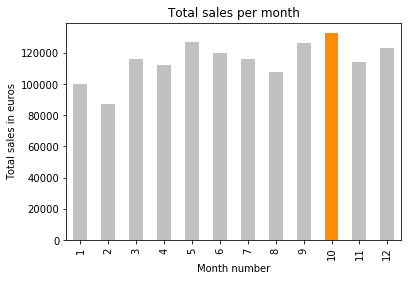

In [33]:
color = ['darkorange' if month == 10 else 'silver' for month in month_data.index]
fig, ax = plt.subplots()
ax = month_data.plot(kind='bar', color=color)
ax.set_xlabel('Month number')
ax.set_ylabel('Total sales in euros')
ax.set_title('Total sales per month')
plt.show()

October was the best month for sales. In October the store earned €133194,90.

### What city had the highest number of sales?

In [34]:
sales_city = all_data.groupby('City')['Total price'].sum()
sales_city.sort_values(ascending=False)

City
Amsterdam              195521.65
Rotterdam              140965.99
Den Haag               125900.77
Utrecht                 77155.39
Eindhoven               53755.34
Groningen               53377.05
Almere                  48702.06
Tilburg                 45156.71
Breda                   39160.44
Amersfoort              38951.76
Haarlem                 38630.94
Enschede                34760.92
Apeldoorn               34577.56
Nijmegen                34301.14
's-Hertogenbosch        33844.37
Zaandam                 33207.31
Arnhem                  32553.18
Leeuwarden              28494.19
Maastricht              27825.27
Leiden                  26613.74
Alphen aan den Rijn     25903.87
Ede                     25791.99
Dordrecht               25524.11
Deventer                24656.50
Venlo                   24477.54
Zwolle                  24472.56
Delft                   23035.81
Zoetermeer              22464.39
Alkmaar                 22421.96
Emmen                   21644.75
Name:

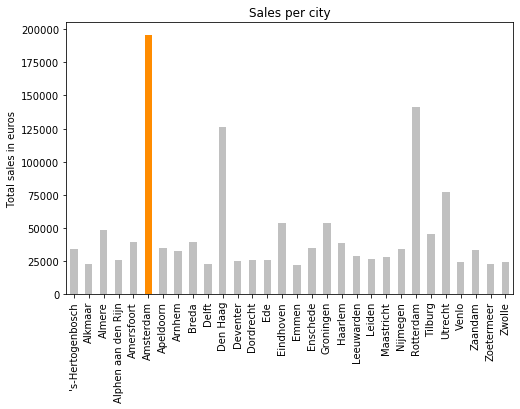

In [35]:
color = ['darkorange' if city == 'Amsterdam' else 'silver' for city in sales_city.index]
fig, ax = plt.subplots(figsize=[8,5])
ax = sales_city.plot(kind='bar', color=color)
ax.set_xlabel('')
ax.set_ylabel('Total sales in euros')
ax.set_title('Sales per city')
plt.show()

### What time should advertisements be displayed to maximize likelihood of customer's buying a product?

In [36]:
hour_data = all_data.groupby(all_data.index.hour)['Order ID'].nunique()
hour_data

Order Date
0     297
1     188
2      91
3      62
4      58
5      85
6     151
7     311
8     468
9     640
10    755
11    871
12    966
13    901
14    867
15    760
16    765
17    761
18    919
19    910
20    923
21    848
22    637
23    449
Name: Order ID, dtype: int64

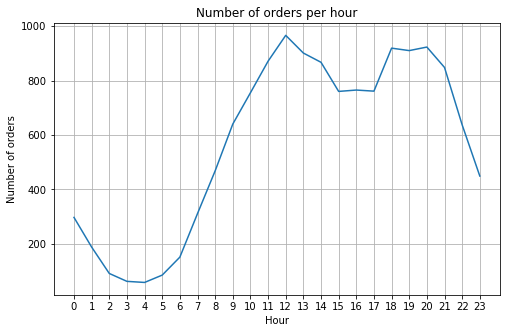

In [37]:
fig, ax = plt.subplots(figsize=[8,5])
ax = hour_data.plot()
ax.set_xticks(hour_data.index)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of orders')
ax.set_title('Number of orders per hour')
ax.grid()
plt.show()

Most sales occur between 11am-12pm and 6pm-8pm.

### Women shoes

In [38]:
womens_shoes = all_data[(all_data['Category'] == 'Shoes') & (all_data['Gender'] == 'F')]
womens_shoes.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price,City
Order Date,,,,,,,,,,,
2019-04-21 16:00:00,40096,Shoes,F,Calf Boots,39.0,grey,1,149.99,"Stationsstraat 84, 1084CN Rotterdam",149.99,Rotterdam
2019-01-04 19:28:00,40097,Shoes,F,Ankle Boots,41.0,white,1,119.99,"Molenstraat 38, 1030AN Deventer",119.99,Deventer
2019-04-29 15:23:00,40102,Shoes,F,Ankle Boots,40.0,beige,1,119.99,"Prins Hendrikstraat 38, 1017BV Amsterdam",119.99,Amsterdam
2019-04-29 15:23:00,40102,Shoes,F,Ankle Boots,41.0,beige,1,119.99,"Prins Hendrikstraat 38, 1017BV Amsterdam",119.99,Amsterdam
2019-04-29 15:13:00,40105,Shoes,F,Sneakers,39.0,beige,1,99.99,"Julianalaan 85, 1070CI Almere",99.99,Almere


In [39]:
product_count = womens_shoes.groupby('Product', observed=True)['Quantity Ordered'].sum()

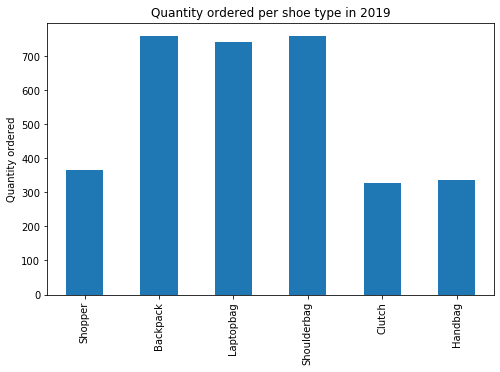

In [80]:
fig, ax = plt.subplots(figsize=[8,5])
ax = product_count.plot(kind='bar')
ax.set_xlabel('')
ax.set_ylabel('Quantity ordered')
ax.set_title('Quantity ordered per shoe type in 2019')
plt.show()

In [81]:
product_time = pd.pivot_table(womens_shoes, values='Quantity Ordered', columns='Product', index=womens_shoes.index.month, aggfunc='sum')
product_time

Product,Ankle Boots,Ballerinas,Calf Boots,Flip Flops,Pumps,Sandals,Sneakers,Wedges
Order Date,,,,,,,,
1,88,69,98,27,78,26,76,35
2,38,100,30,49,87,32,127,55
3,50,110,38,55,127,41,194,65
4,63,110,34,38,122,49,146,73
5,28,126,29,140,112,142,119,142
6,36,121,33,128,120,128,112,117
7,23,112,36,126,97,136,117,113
8,63,102,35,33,79,39,158,68
9,61,115,25,31,151,44,197,81


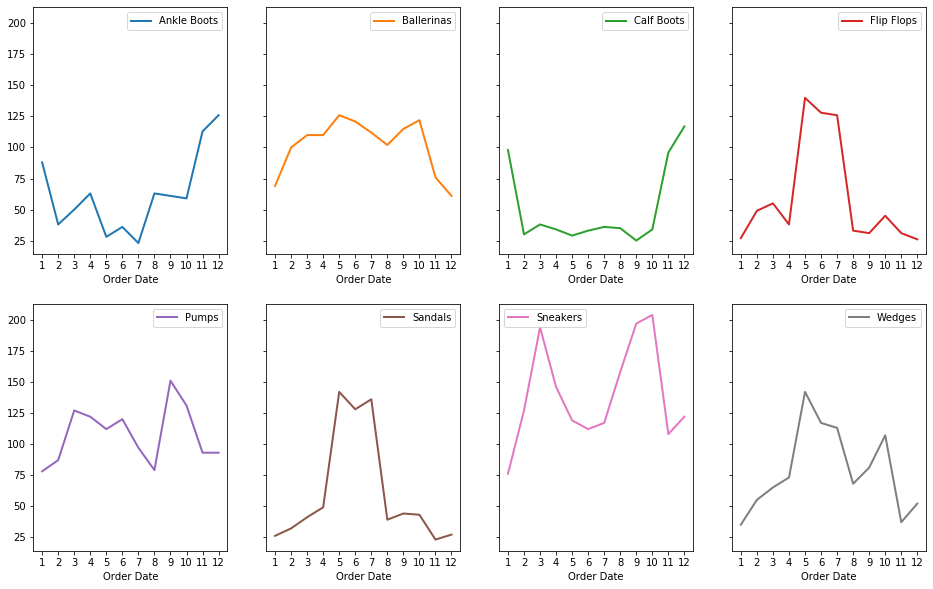

In [82]:
product_time.plot(subplots=True, layout=(2,4), figsize=(16,10), linewidth=2, xticks=product_time.index, 
                  sharex=False, sharey=True)
plt.show()

### Mens shoes

In [83]:
mens_shoes = all_data[(all_data['Category'] == 'Shoes') & (all_data['Gender'] == 'M')]
mens_shoes.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price,City
Order Date,,,,,,,,,,,
2019-04-18 10:32:00,40098,Shoes,M,Boots,42.0,black,1,119.99,"Meidoornlaan 80, 1096IA Haarlem",119.99,Haarlem
2019-04-29 12:01:00,40100,Shoes,M,Combat,39.0,multicolor,1,119.99,"Berkenlaan 87, 1029SS Emmen",119.99,Emmen
2019-04-29 12:01:00,40100,Shoes,M,Boots,39.0,beige,1,119.99,"Berkenlaan 87, 1029SS Emmen",119.99,Emmen
2019-05-04 06:06:00,40110,Shoes,M,Sandals,38.0,brown,1,49.99,"Kloosterstraat 18, 1097NU Zoetermeer",49.99,Zoetermeer
2019-12-04 13:12:00,40113,Shoes,M,Combat,38.0,black,1,119.99,"Eikenlaan 9, 1001OP Arnhem",119.99,Arnhem


In [84]:
product_count = mens_shoes.groupby('Product', observed=True)['Quantity Ordered'].sum()

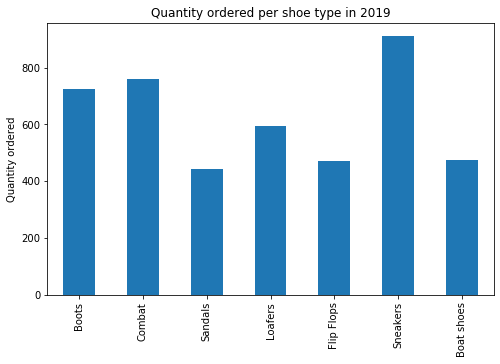

In [85]:
fig, ax = plt.subplots(figsize=[8,5])
ax = product_count.plot(kind='bar')
ax.set_xlabel('')
ax.set_ylabel('Quantity ordered')
ax.set_title('Quantity ordered per shoe type in 2019')
plt.show()

In [86]:
product_time = pd.pivot_table(mens_shoes, values='Quantity Ordered', columns='Product', index=mens_shoes.index.month, aggfunc='sum')
product_time

Product,Boat shoes,Boots,Combat,Flip Flops,Loafers,Sandals,Sneakers
Order Date,,,,,,,
1,26,77,77,16,21,14,58
2,24,46,57,26,49,15,54
3,36,64,69,32,39,24,91
4,36,60,67,28,44,13,92
5,70,42,24,100,85,81,66
6,53,37,31,76,74,92,60
7,60,30,27,71,73,74,61
8,31,54,68,30,42,23,87
9,35,63,80,24,65,29,86


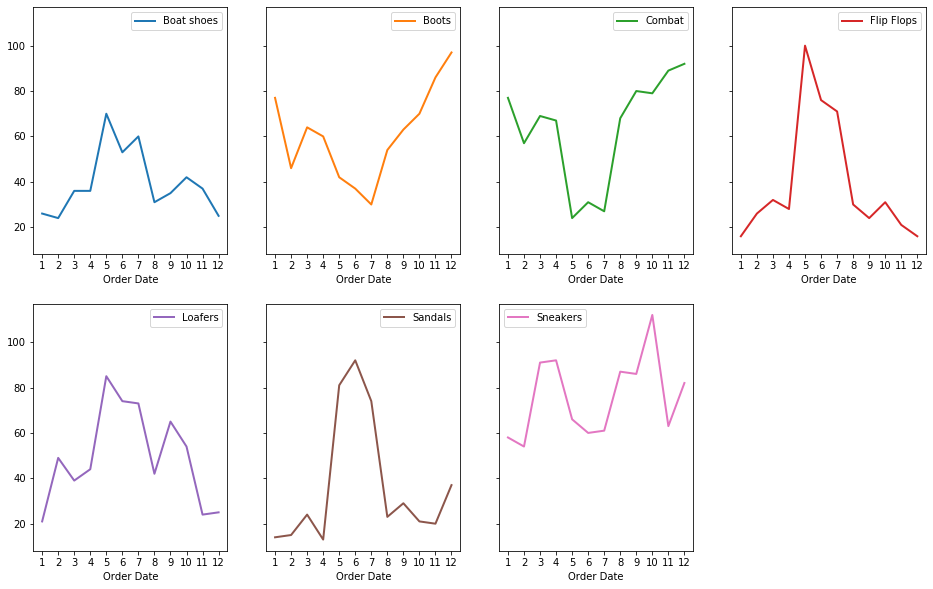

In [87]:
product_time.plot(subplots=True, layout=(2,4), figsize=(16,10), linewidth=2, xticks=product_time.index, 
                  sharex=False, sharey=True)
plt.show()

### Bags

In [88]:
bags = all_data[all_data['Category'] == 'Bags']
bags.head()

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price,City
Order Date,,,,,,,,,,,
2019-01-04 19:28:00,40097,Bags,F,Shopper,NaN,white,1,79.99,"Molenstraat 38, 1030AN Deventer",79.99,Deventer
2019-04-25 12:12:00,40103,Bags,F,Backpack,NaN,brown,1,59.99,"Esdoornstraat 44, 1099SQ Groningen",59.99,Groningen
2019-08-04 14:58:00,40104,Bags,M,Laptopbag,NaN,green,1,99.99,"Parallelweg 48, 1070PJ Enschede",99.99,Enschede
2019-08-04 21:49:00,40107,Bags,F,Laptopbag,NaN,brown,1,99.99,"Oranjestraat 53, 1035UL Ede",99.99,Ede
2019-05-04 06:06:00,40110,Bags,M,Shoulderbag,NaN,brown,1,79.99,"Kloosterstraat 18, 1097NU Zoetermeer",79.99,Zoetermeer


In [89]:
product_count = bags.groupby('Product', observed=True)['Quantity Ordered'].sum()

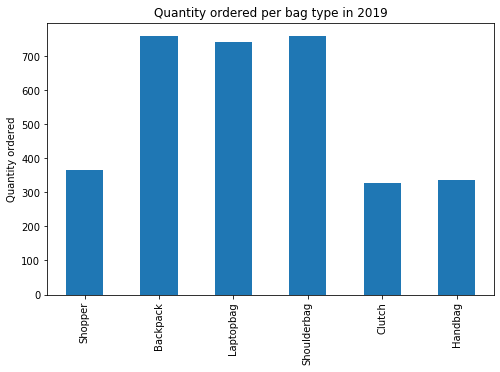

In [90]:
fig, ax = plt.subplots(figsize=[8,5])
ax = product_count.plot(kind='bar')
ax.set_xlabel('')
ax.set_ylabel('Quantity ordered')
ax.set_title('Quantity ordered per bag type in 2019')
plt.show()

 ### How many times per year are shoes being sold together with the same shoe one size smaller or bigger?

When a shoe is sold in 2 different sizes, there is a good change the customers doesn't know what size will fit the best. And after trying them at home, they will probably send the size that doesn't fit back.

In [69]:
diff_size = all_data[(all_data.duplicated(subset=['Order ID', 'Product'], keep=False)) & (all_data['Category'] == 'Shoes')]
diff_size.head(50)

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price,City
Order Date,,,,,,,,,,,
2019-04-29 15:23:00,40102,Shoes,F,Ankle Boots,40.0,beige,1,119.99,"Prins Hendrikstraat 38, 1017BV Amsterdam",119.99,Amsterdam
2019-04-29 15:23:00,40102,Shoes,F,Ankle Boots,41.0,beige,1,119.99,"Prins Hendrikstraat 38, 1017BV Amsterdam",119.99,Amsterdam
2019-04-23 10:07:00,40106,Shoes,F,Pumps,38.0,black,1,89.99,"Margrietstraat 72, 1080EH Arnhem",89.99,Arnhem
2019-04-23 10:07:00,40106,Shoes,F,Pumps,38.0,gold,1,89.99,"Margrietstraat 72, 1080EH Arnhem",89.99,Arnhem
2019-10-04 03:16:00,40108,Shoes,F,Wedges,38.0,black,1,69.95,"Emmastraat 83, 1045KN Rotterdam",69.95,Rotterdam
2019-10-04 03:16:00,40108,Shoes,F,Wedges,37.0,black,1,69.95,"Emmastraat 83, 1045KN Rotterdam",69.95,Rotterdam
2019-04-18 15:45:00,40143,Shoes,M,Loafers,40.0,beige,1,69.99,"Prins Hendrikstraat 48, 1098SD Rotterdam",69.99,Rotterdam
2019-04-18 15:45:00,40143,Shoes,M,Loafers,40.0,multicolor,1,69.99,"Prins Hendrikstraat 48, 1098SD Rotterdam",69.99,Rotterdam
2019-04-16 13:33:00,40144,Shoes,M,Sneakers,40.0,brown,1,99.99,"Wilhelminastraat 36, 1055BN Amsterdam",99.99,Amsterdam


In [75]:
diff_size = diff_size.drop_duplicates(subset=['Order ID', 'Size'], keep=False)
diff_size.head(10)

,Order ID,Category,Gender,Product,Size,Color,Quantity Ordered,Price each,Purchase Address,Total price,City
Order Date,,,,,,,,,,,
2019-04-29 15:23:00,40102,Shoes,F,Ankle Boots,40.0,beige,1,119.99,"Prins Hendrikstraat 38, 1017BV Amsterdam",119.99,Amsterdam
2019-04-29 15:23:00,40102,Shoes,F,Ankle Boots,41.0,beige,1,119.99,"Prins Hendrikstraat 38, 1017BV Amsterdam",119.99,Amsterdam
2019-10-04 03:16:00,40108,Shoes,F,Wedges,38.0,black,1,69.95,"Emmastraat 83, 1045KN Rotterdam",69.95,Rotterdam
2019-10-04 03:16:00,40108,Shoes,F,Wedges,37.0,black,1,69.95,"Emmastraat 83, 1045KN Rotterdam",69.95,Rotterdam
2019-04-16 13:33:00,40144,Shoes,M,Sneakers,40.0,brown,1,99.99,"Wilhelminastraat 36, 1055BN Amsterdam",99.99,Amsterdam
2019-04-16 13:33:00,40144,Shoes,M,Sneakers,39.0,brown,1,99.99,"Wilhelminastraat 36, 1055BN Amsterdam",99.99,Amsterdam
2019-04-23 20:37:00,40145,Shoes,F,Wedges,42.0,grey,1,69.95,"Middenweg 34, 1012CA Enschede",69.95,Enschede
2019-04-23 20:37:00,40145,Shoes,F,Wedges,43.0,grey,1,69.95,"Middenweg 34, 1012CA Enschede",69.95,Enschede
2019-04-26 23:16:00,40154,Shoes,F,Sneakers,42.0,grey,1,99.99,"Rozenstraat 6, 1020QL Almere",99.99,Almere


In [67]:
all_data['Order ID'].nunique()

13683

In [68]:
diff_size['Order ID'].count()

1486

In [74]:
pct_diff_size = 100 / all_data['Order ID'].nunique() * diff_size['Order ID'].count()
pct_diff_size.round(1)

10.9

There was a total of 13683 orders in 2019 and there were 1486 orders where the same shoe was sold in 2 different sizes, that's 10,9% of the total orders